In [1]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(grid)
library(gridExtra)
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
#?colnames
colnames(airbnb)<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrados


In [5]:
#aprovecho y redondeo el resultado del cambio de pies a metros
airbnb$MetrosCuadrados<-round(airbnb$PiesCuadrados*0.092903,2)
str(airbnb)

'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados  : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio         : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Pun

In [6]:
# También cambio ya los que tienen 0 metros por NA
airbnb$MetrosCuadrados<- na_if(airbnb$MetrosCuadrados, 0)
summary(airbnb)

  CodigoPostal          Barrio             TipoPropiedad  
 28012  :2060   Embajadores:1844   Apartment      :10888  
 28004  :1794   Universidad:1358   House          :  966  
 28005  :1194   Palacio    :1083   Condominium    :  345  
 28013  :1019   Sol        : 940   Bed & Breakfast:  337  
 28014  : 630   Justicia   : 785   Loft           :  283  
 28015  : 600   Cortes     : 750   Other          :  220  
 (Other):5910   (Other)    :6447   (Other)        :  168  
          TipoAlquiler   MaxOcupantes      NumBanyos     NumDormitorios  
 Entire home/apt:7903   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Private room   :5113   1st Qu.: 2.000   1st Qu.:1.000   1st Qu.: 1.000  
 Shared room    : 191   Median : 2.000   Median :1.000   Median : 1.000  
                        Mean   : 3.191   Mean   :1.253   Mean   : 1.294  
                        3rd Qu.: 4.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                        Max.   :16.000   Max.   :8.000   Max.   :10.000  
          

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no comiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 junto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [7]:
airbnb$CodigoPostal[airbnb$CodigoPostal==''|airbnb$CodigoPostal=='-'|airbnb$CodigoPostal=='1'|airbnb$CodigoPostal=='20013'|airbnb$CodigoPostal=='20126'|airbnb$CodigoPostal=='2015'|airbnb$CodigoPostal=='25008'|airbnb$CodigoPostal=='27004'|airbnb$CodigoPostal=='27013'|airbnb$CodigoPostal=='28']<-NA

airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '2804', '28004')) #porque lo pone en el enunciado. yo pondría NA porque puede ser varias opciones además del 28004/28040, no sé si me equivoco
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '2805', '28005')) #igual que el anterior, para mí podría ser 28005 o 28050 y pondría NA. es posible?
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '2815', '28015'))
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== 'Madrid 28004', '28004'))
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '28051\n28051', '28051'))
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '28002\n28002', '28002'))
airbnb<- airbnb %>% mutate(CodigoPostal = replace(CodigoPostal, CodigoPostal== '280013', '28013'))




In [8]:
levels(airbnb$CodigoPostal)
summary(airbnb$CodigoPostal)

[1] ""             "-"            "20013"        "20126"        "2015"        
 [6] "25008"        "27004"        "27013"        "28"           "28001"       
[11] "280013"       "28002"        "28002\n28002" "28003"        "28004"       
[16] "28005"        "28006"        "28007"        "28008"        "28009"       
[21] "28010"        "28011"        "28012"        "28013"        "28014"       
[26] "28015"        "28016"        "28017"        "28018"        "28019"       
[31] "28020"        "28021"        "28022"        "28023"        "28024"       
[36] "28025"        "28026"        "28027"        "28028"        "28029"       
[41] "28030"        "28031"        "28032"        "28033"        "28034"       
[46] "28035"        "28036"        "28037"        "28038"        "28039"       
[51] "2804"         "28040"        "28041"        "28042"        "28043"       
[56] "28044"        "28045"        "28046"        "28047"        "28048"       
[61] "28049"        "2805"         "28050"        "28051"        "28051\n28051"
[66] "28052"        "28053"        "28054"        "28055"        "28056"       
[71] "28058"        "28060"        "28094"        "28105"        "2815"        
[76] "28850"        "Madrid 28004"

-        20013        20126         2015        25008 
           0            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0          231            0          171 
28002\n28002        28003        28004        28005        28006        28007 
           0          185         1796         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1020 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            0           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           17            0            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            0          447

In [9]:
#para quitar los niveles que he dejado a 0 al convertirlos en NA paso a character y luego otra vez a factor.
#Hay alguna fórmula mejor, verdad? 
airbnb$CodigoPostal<-as.factor(as.character(airbnb$CodigoPostal)) 
levels(airbnb$CodigoPostal)



[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [10]:
paste('Los códigos postales que tenemos en Madrid capital son:' )
levels(airbnb$CodigoPostal)



[1] "Los códigos postales que tenemos en Madrid capital son:"

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"


¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [11]:
print('Los 5 códigos postales con más entradas junto con el número de entradas correspondiente, son:')
head(sort(table(airbnb$CodigoPostal), decreasing = T),n=5L)

paste('Los 5 códigos postales con menos entradas junto con el número de entradas, son:')
head(sort(table(airbnb$CodigoPostal), decreasing = F),n=5L)

#no tengo clara la ventaja de uno u otro método (print vs paste), casi prefiero paste que no tiene el 1.

[1] "Los 5 códigos postales con más entradas junto con el número de entradas correspondiente, son:"



28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

[1] "Los 5 códigos postales con menos entradas junto con el número de entradas, son:"


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [12]:
paste('Los barrios que hay en el código postal 28012 son ', n_distinct(airbnb$Barrio[airbnb$CodigoPostal=='28012'], na.rm = TRUE),': ')
unique(na.omit(airbnb$Barrio[airbnb$CodigoPostal=='28012']))



[1] "Los barrios que hay en el código postal 28012 son  11 : "

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [13]:
airbnb %>% filter(CodigoPostal=='28012')%>% count(Barrio)

#summary(airbnb$Barrio[airbnb$CodigoPostal=='28012'])#duda por qué salen todos los demás barrios 

Barrio,n
<fct>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [14]:
paste('En el dataset de airbnb Madrid hay: ', n_distinct(airbnb$Barrio), 'barrios. ')
#str(airbnb$Barrio)

paste('Los barrios de airbnb Madrid son:')
levels(airbnb$Barrio)



[1] "En el dataset de airbnb Madrid hay:  125 barrios. "

[1] "Los barrios de airbnb Madrid son:"

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [15]:
head(sort(summary(airbnb$Barrio),decreasing = T),5)

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [16]:
paste('Los tipos de alquiler diferentes en el dataset son: ', n_distinct(airbnb$TipoAlquiler), ' y el tipo y número de entradas por cada tipo son: ')

airbnb %>% group_by(TipoAlquiler) %>% summarise(num_entradas_por_tipo = n())

#airbnb %>% count(TipoAlquiler)

[1] "Los tipos de alquiler diferentes en el dataset son:  3  y el tipo y número de entradas por cada tipo son: "

TipoAlquiler,num_entradas_por_tipo
<fct>,<int>
Entire home/apt,7903
Private room,5113
Shared room,191


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


[1] 9

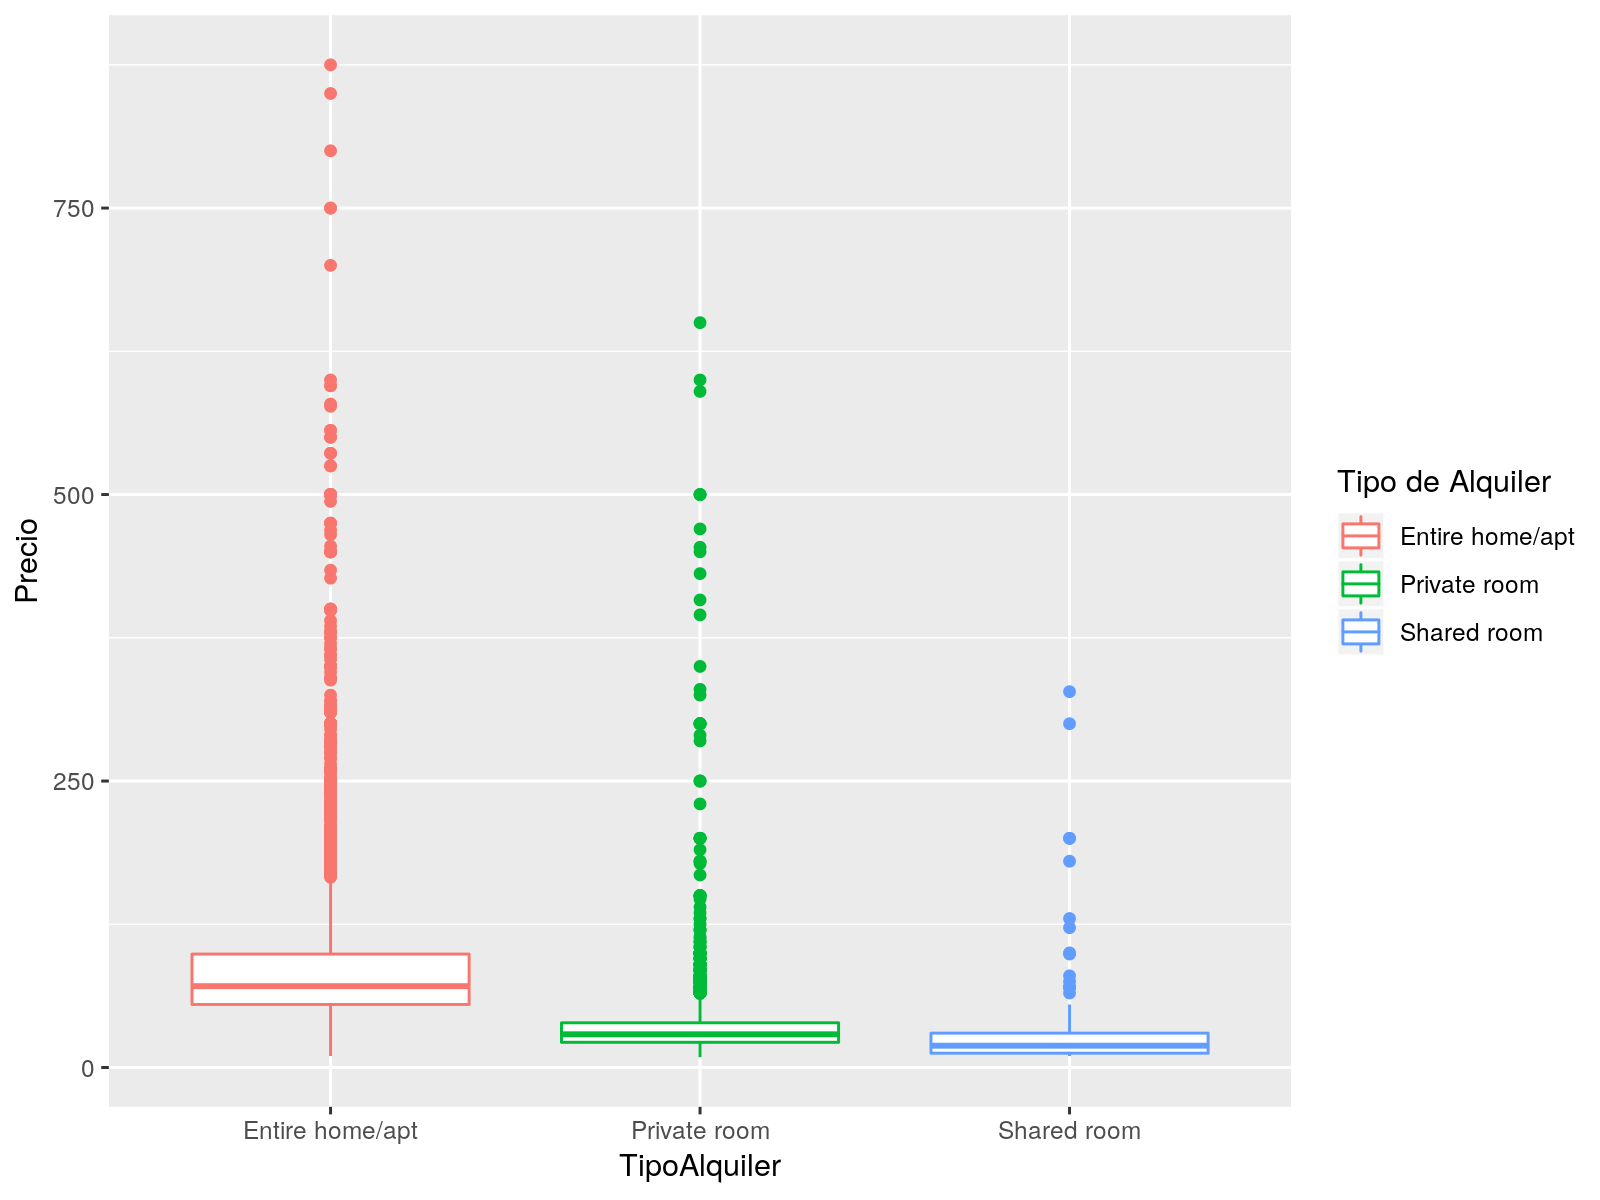

In [17]:
ggplot(airbnb,aes(x=TipoAlquiler,y=Precio,color=TipoAlquiler))+geom_boxplot()+
    scale_color_discrete(name="Tipo de Alquiler")
#reviso warning: “Removed 9 rows containing non-finite values (stat_boxplot).”
sum(is.na(airbnb$Precio)) #compruebo que los 9 valores son NA por lo que dejo la gráfica como está y valoro quitar esas entradas del dataframe
#?boxplot
#boxplot(Precio ~ TipoAlquiler, airbnb)

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [18]:
paste('El precio medio del alquiler por cada grupo ofertado es: ')
airbnb %>%
  group_by(TipoAlquiler) %>%
  summarise(Precio_medio = round(mean(Precio, na.rm = TRUE),2))

paste('Lo primero que tengo que ver para comprobar si la diferencia de las medias es significativa o si es debida al azar es ver si los grupos siguen una distribución gaussiana con el test de Shapiro. Este test tiene un máximo de 5000 entradas y el grupo de entire home tiene 7903, y el de Private room 5113, por ello cojo 5000 elementos para el test de estos dos grupos. Para shared room utilizo todas las entradas para ver su pvalue.')
#me facilito la aplicación creando un subset de cada tipo de alojamiento de los que tienen más de 5000 entradas. 
airbnb_entire<-airbnb[airbnb$TipoAlquiler=='Entire home/apt',]
airbnb_private<-airbnb[airbnb$TipoAlquiler=='Private room',]

#limpio para quitar niveles sin asignaciones que quedan al hacer el subset y me pueden dar error.
airbnb_entire$TipoAlquiler<-as.factor(as.numeric(airbnb_entire$TipoAlquiler))
airbnb_private$TipoAlquiler<-as.factor(as.numeric(airbnb_private$TipoAlquiler))

paste('Al aplicar el test de Shapiro sobre el grupo de Entire Home/apt obtengo un pvalue de: ')
shapiro.test(airbnb_entire$Precio[1:5000[airbnb_entire$TipoAlquiler]])$p.value 

paste('Al aplicar el test de Shapiro sobre el grupo de Private room obtengo un pvalue de: ')
shapiro.test(airbnb_private$Precio[1:5000[airbnb_private$TipoAlquiler]])$p.value 

paste('Al aplicar el test de Shapiro sobre el grupo de Shared room obtengo un pvalue de: ')
shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=="Shared room"])$p.value

paste('el p-valor es muy bajo con lo que puedo decir que la distribución no es normal')

paste('Al no seguir uno de los grupos una distribución Gaussiana, aplico un test de Kruskal-Wallis')
kruskal.test( Precio ~ TipoAlquiler, data=airbnb)

paste('Con el test Kruskal-Wallis obtengo un p valor muy bajo -menor que alpha 0.05- y puedo decir que las diferencias de las medias son estadísticamente significativas')
paste('Aprovecho y confirmo el resultado con la regresión lineal')
summary(lm(Precio ~ TipoAlquiler, data=airbnb))

#pensaba intentar seleccionar una muestra aleatoria de entire home para poder aplicar el test de shapiro, pero no conseguí hacerlo
#airbnb_entire$TipoAlquiler<-as.numeric(airbnb_entire$TipoAlquiler)
#shapiro.test(airbnb_entire$Precio[sample(1:nrow(airbnb_entire$TipoAlquiler),5000)])$p.value 



[1] "El precio medio del alquiler por cada grupo ofertado es: "

TipoAlquiler,Precio_medio
<fct>,<dbl>
Entire home/apt,87.30
Private room,34.26
Shared room,29.85


[1] "Lo primero que tengo que ver para comprobar si la diferencia de las medias es significativa o si es debida al azar es ver si los grupos siguen una distribución gaussiana con el test de Shapiro. Este test tiene un máximo de 5000 entradas y el grupo de entire home tiene 7903, y el de Private room 5113, por ello cojo 5000 elementos para el test de estos dos grupos. Para shared room utilizo todas las entradas para ver su pvalue."

[1] "Al aplicar el test de Shapiro sobre el grupo de Entire Home/apt obtengo un pvalue de: "

Warning message in 1:5000[airbnb_entire$TipoAlquiler]:
“numerical expression has 7903 elements: only the first used”


[1] 1.240779e-72

[1] "Al aplicar el test de Shapiro sobre el grupo de Private room obtengo un pvalue de: "

Warning message in 1:5000[airbnb_private$TipoAlquiler]:
“numerical expression has 5113 elements: only the first used”


[1] 9.189748e-85

[1] "Al aplicar el test de Shapiro sobre el grupo de Shared room obtengo un pvalue de: "

[1] 4.516721e-24

[1] "el p-valor es muy bajo con lo que puedo decir que la distribución no es normal"

[1] "Al no seguir uno de los grupos una distribución Gaussiana, aplico un test de Kruskal-Wallis"


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Con el test Kruskal-Wallis obtengo un p valor muy bajo -menor que alpha 0.05- y puedo decir que las diferencias de las medias son estadísticamente significativas"

[1] "Aprovecho y confirmo el resultado con la regresión lineal"


Call:
lm(formula = Precio ~ TipoAlquiler, data = airbnb)

Residuals:
   Min     1Q Median     3Q    Max 
-77.30 -22.30  -9.26   5.74 787.70 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               87.2966     0.5578  156.50   <2e-16 ***
TipoAlquilerPrivate room -53.0415     0.8898  -59.61   <2e-16 ***
TipoAlquilerShared room  -57.4432     3.6296  -15.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.57 on 13195 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.2169,	Adjusted R-squared:  0.2168 
F-statistic:  1828 on 2 and 13195 DF,  p-value: < 2.2e-16


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [19]:
airbnb_entire<-airbnb[airbnb$TipoAlquiler=='Entire home/apt',]
table(airbnb_entire$TipoAlquiler)

airbnb_entire$TipoAlquiler<-as.factor(as.numeric(airbnb_entire$TipoAlquiler))
str(airbnb_entire)





Entire home/apt    Private room     Shared room 
           7903               0               0 

'data.frame':	7903 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 61 levels "28001","28002",..: 4 4 4 15 4 4 15 4 4 13 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 112 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 16 1 1 1 1 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  6 3 3 5 2 3 2 4 4 4 ...
 $ NumBanyos      : num  1 1 2 1 1 1 1 2 1 1 ...
 $ NumDormitorios : int  3 2 1 1 0 1 1 2 1 1 ...
 $ NumCamas       : int  5 2 1 1 1 NA 1 2 2 1 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 4020 3249 4039 8369 2047 7436 5618 7736 8582 7255 ...
 $ PiesCuadrados  : int  NA NA NA 538 NA NA 700 NA 40 646 ...
 $ Precio         : int  92 55 60 75 55 70 90 155 70 75 ...
 $ Puntuacion     : int  96 91

¿Cuáles son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [20]:
paste('Los 5 barrios con un mayor número de apartamentos enteros en alquiler son: ')
airbnb_entire %>%
select(Barrio,TipoAlquiler) %>%
  group_by(Barrio) %>%
  summarise(num_aptos_enteros_por_barrio_en_alquiler = n()) %>%
  arrange(desc(num_aptos_enteros_por_barrio_en_alquiler)) %>%
  head(n=5)





[1] "Los 5 barrios con un mayor número de apartamentos enteros en alquiler son: "

Barrio,num_aptos_enteros_por_barrio_en_alquiler
<fct>,<int>
Embajadores,1228
Universidad,984
Palacio,769
Sol,701
Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [21]:
paste('Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros junto con su precio medio son:')
#La opción más facil para mí sería: 
airbnb_entire %>%
  group_by(Barrio) %>%
  summarise(Precio_medio = round(mean(Precio, na.rm = TRUE),2))%>%
  arrange(desc(Precio_medio))%>%
  head(5)

#según la ayuda: 
precio_medio_barrio<- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
#obtengo un dataframe y sobre este ordeno y saco las 5 primeras filas. No consigo redondear..
precio_medio_barrio[head(order(precio_medio_barrio$Precio,decreasing=T),5),]



[1] "Los 5 barrios con un mayor precio medio de alquiler para apartamentos enteros junto con su precio medio son:"

Barrio,Precio_medio
<fct>,<dbl>
Palomas,309.75
Fuentelareina,180.00
Recoletos,161.93
El Plantío,150.00
Castellana,141.39


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [22]:
aptos_barrio<-airbnb_entire %>% group_by(Barrio) %>% summarise(n_aptos= n()) 

frecuencia_aptos_enteros_barrios<-merge(precio_medio_barrio,aptos_barrio, by='Barrio')
paste('En cada uno de los barrios de la pregunta anterior, es decir, en los 5 barrios con mayor precio medio de alquiler, hay los siguientes apartamentos: ')
frecuencia_aptos_enteros_barrios[head(order(frecuencia_aptos_enteros_barrios$Precio,decreasing=T),5),]



[1] "En cada uno de los barrios de la pregunta anterior, es decir, en los 5 barrios con mayor precio medio de alquiler, hay los siguientes apartamentos: "

,Barrio,Precio,n_aptos
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [23]:
paste('Los 5 barrios con mayor precio que tengan más de 100 entradas de alquiler son: ')
frecuencia_aptos_enteros_barrios %>%
 filter(n_aptos>100) %>%
 arrange(desc(Precio)) %>%
 head(5)
    


[1] "Los 5 barrios con mayor precio que tengan más de 100 entradas de alquiler son: "

,Barrio,Precio,n_aptos
,<fct>,<dbl>,<int>
1,Recoletos,161.92537,135
2,Goya,111.33803,142
3,Sol,100.75036,701
4,Trafalgar,98.57848,223
5,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

[1] "Los diagramas de densidad de distribución de los 5 barrios más caros con más de 100 entradas son:"

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


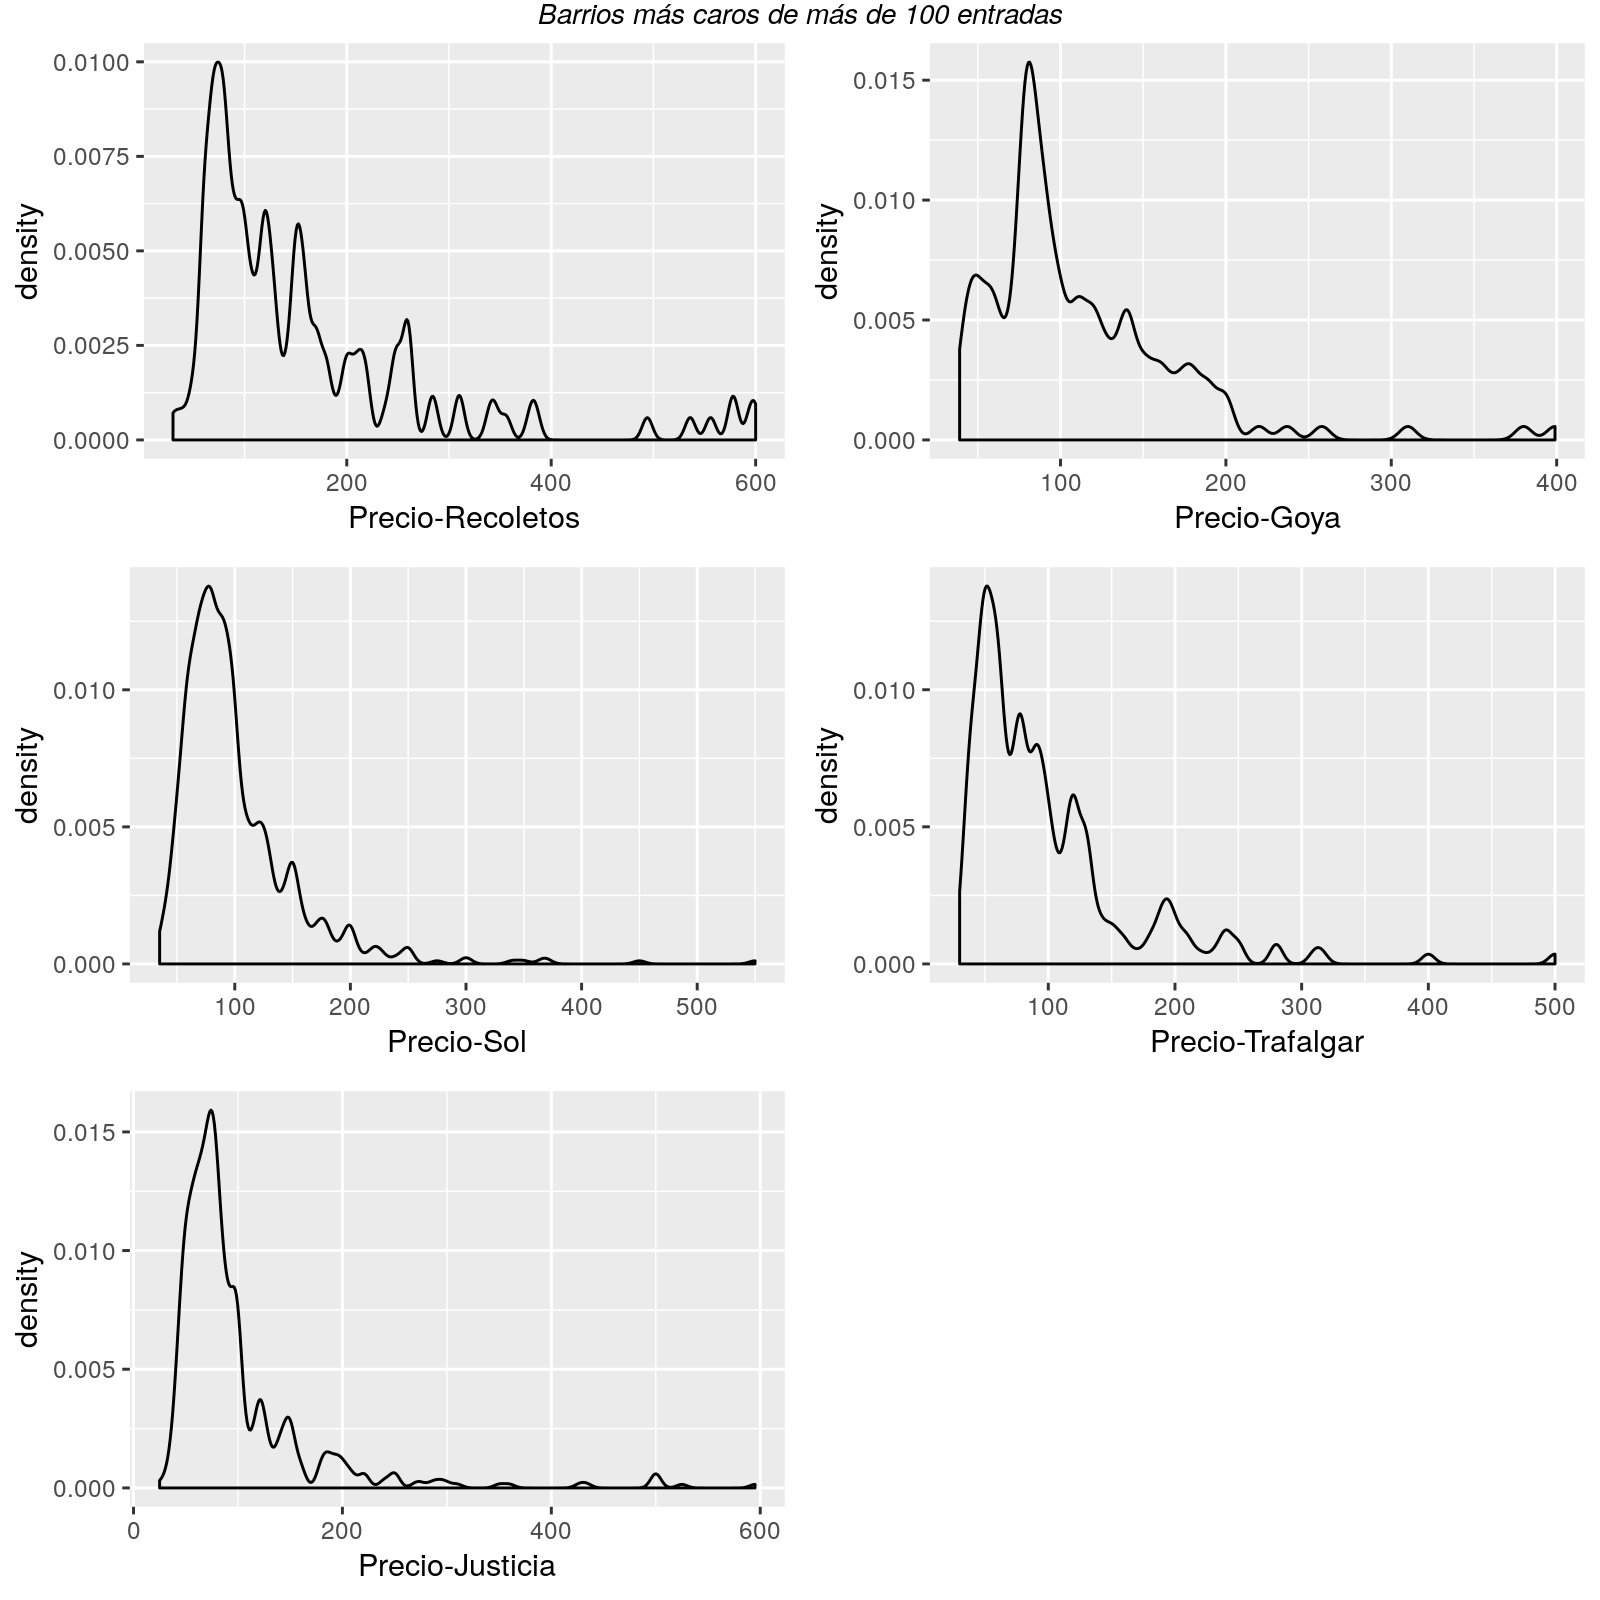

In [24]:
options(repr.plot.height=8,repr.plot.width=8 , repr.plot.res = 200)

paste('Los diagramas de densidad de distribución de los 5 barrios más caros con más de 100 entradas son:')
barrio_Recoletos<-subset(airbnb_entire,Barrio=="Recoletos")

g1<- ggplot(barrio_Recoletos, aes(x=Precio))+ geom_density(bw=5)+xlab("Precio-Recoletos")

#paste('El diagrama de densidad de distribución del Barrio de Goya sería:')
barrio_Goya<-subset(airbnb_entire,Barrio=="Goya")
g2<- ggplot(barrio_Goya, aes(x=Precio))+ geom_density(bw=5)+xlab("Precio-Goya")

#paste('El diagrama de densidad de distribución del Barrio de Sol sería:')
barrio_Sol<-subset(airbnb_entire,Barrio=="Sol")
g3<- ggplot(barrio_Sol, aes(x=Precio))+ geom_density(bw=5)+xlab("Precio-Sol")

#paste('El diagrama de densidad de distribución del Barrio de Trafalgar sería:')
barrio_Trafalgar<-subset(airbnb_entire,Barrio=="Trafalgar")
g4<- ggplot(barrio_Trafalgar, aes(x=Precio))+ geom_density(bw=5)+xlab("Precio-Trafalgar")

#paste('El diagrama de densidad de distribución del Barrio de Justicia sería:')
barrio_Justicia<-subset(airbnb_entire,Barrio=="Justicia")
g5<- ggplot(barrio_Justicia, aes(x=Precio))+ geom_density(bw=5)+xlab("Precio-Justicia")

grid.arrange(g1, g2, g3, g4,g5, nrow = 3,top = textGrob("Barrios más caros de más de 100 entradas",gp=gpar(fontsize=10,font=3)))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [25]:
#Recuerdo que en la limpieza de datos cambié los metros cuadrados que tenían valor 0 por NA.
#Valorar si con esto es suficiente o es necesario limpiar algún dato más. 
#Pendiente comprobar si hay apartamentos enteros con menos x(10-20?) metros cuadrados y quitarlos?  
tamaño_medio_barrio<- aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE)
tamaño_frecuencia_barrios<-merge(frecuencia_aptos_enteros_barrios,tamaño_medio_barrio, by='Barrio')

tamaño_frecuencia_barrios %>% 
 filter(n_aptos>100) %>%
 arrange(desc(Precio)) %>%
 head(5)

,Barrio,Precio,n_aptos,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
1,Recoletos,161.92537,135,26.66333
2,Goya,111.33803,142,77.52500
3,Sol,100.75036,701,68.42625
4,Trafalgar,98.57848,223,51.28250
5,Justicia,98.25468,534,53.88444


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

[1] "Los diagramas de densidad de distribución de los tamaños de los 5 barrios más caros con más de 100 entradas son:"

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”
Warning message:
“Removed 140 rows containing non-finite values (stat_density).”


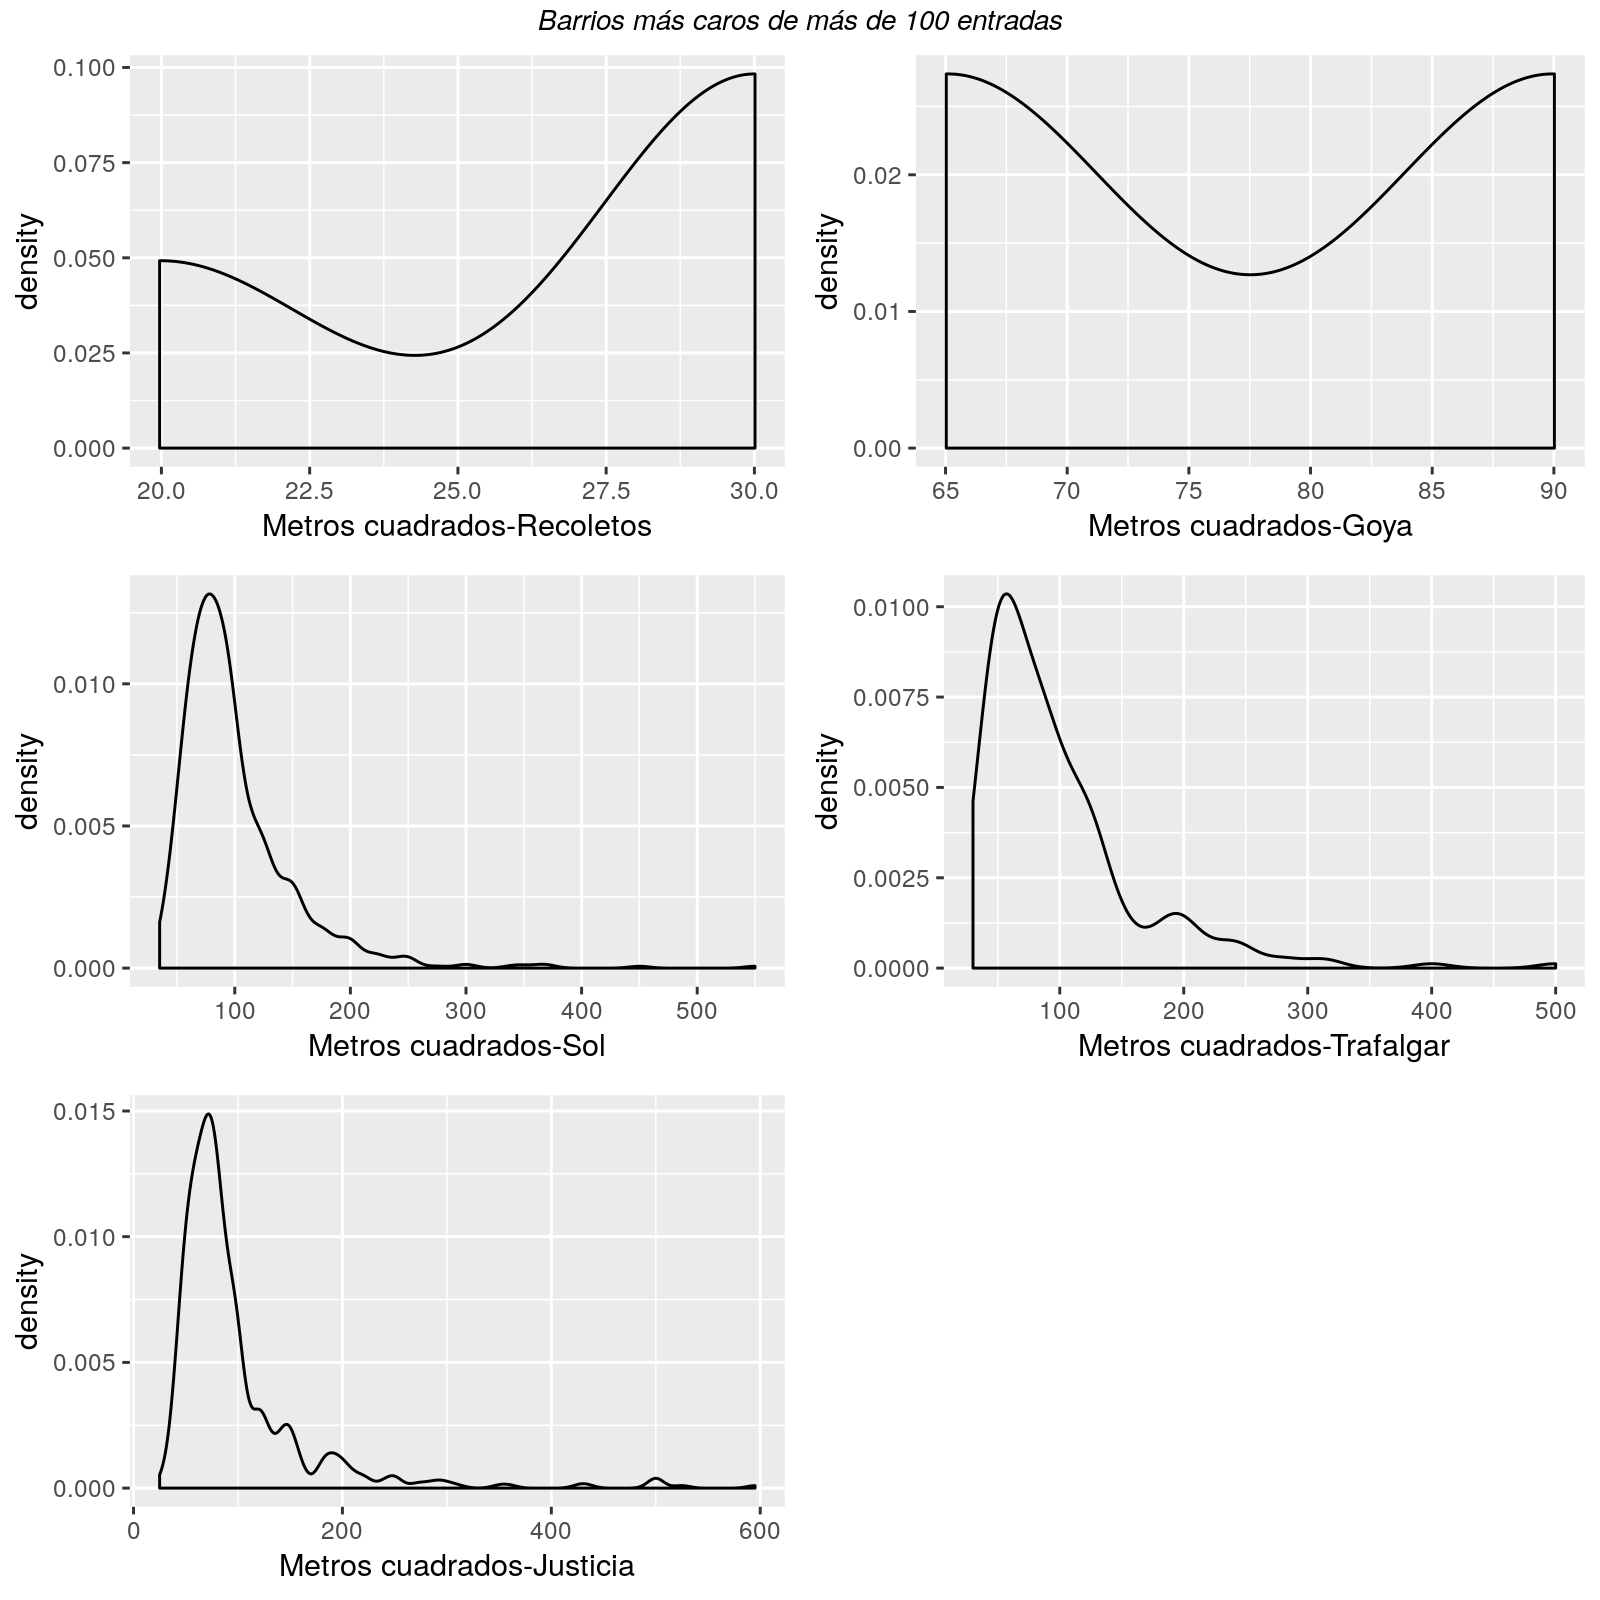

In [26]:
paste('Los diagramas de densidad de distribución de los tamaños de los 5 barrios más caros con más de 100 entradas son:')
barrio_Recoletos<-subset(airbnb_entire,Barrio=="Recoletos")

g1<- ggplot(barrio_Recoletos, aes(x=MetrosCuadrados))+ geom_density()+xlab("Metros cuadrados-Recoletos")

#paste('El diagrama de densidad de distribución del Barrio de Goya sería:')
barrio_Goya<-subset(airbnb_entire,Barrio=="Goya")
g2<- ggplot(barrio_Goya, aes(x=MetrosCuadrados))+ geom_density()+xlab("Metros cuadrados-Goya")

#paste('El diagrama de densidad de distribución del Barrio de Sol sería:')
barrio_Sol<-subset(airbnb_entire,Barrio=="Sol")
g3<- ggplot(barrio_Sol, aes(x=Precio))+ geom_density()+xlab("Metros cuadrados-Sol")

#paste('El diagrama de densidad de distribución del Barrio de Trafalgar sería:')
barrio_Trafalgar<-subset(airbnb_entire,Barrio=="Trafalgar")
g4<- ggplot(barrio_Trafalgar, aes(x=Precio))+ geom_density()+xlab("Metros cuadrados-Trafalgar")

#paste('El diagrama de densidad de distribución del Barrio de Justicia sería:')
barrio_Justicia<-subset(airbnb_entire,Barrio=="Justicia")
g5<- ggplot(barrio_Justicia, aes(x=Precio))+ geom_density()+xlab("Metros cuadrados-Justicia")

grid.arrange(g1, g2, g3, g4,g5, nrow = 3,top = textGrob("Barrios más caros de más de 100 entradas",gp=gpar(fontsize=10,font=3)))

#pruebo con diferentes bw y me parece que dejar el valor por defecto es lo más visual para la comparación de las gráficas

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [27]:
paste('Al ser 3 o más grupos, el primer test para comprobar si las diferencias son significativas es Shapiro para ver si siguen una distribución gaussiana.Pruebo con Recoletos y el pvalue es 0 con lo que no es gaussiana y tengo que pasar al test de Kruskal. Pruebo también con Sol y aunque algo mayor, el pvalue es bajo.')
paste('El pvalue para Recoletos es: ', shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Recoletos"])$p.value)

#Aunque Recoletos me sale a 0 y ya sé que tengo que hacer Kruskal pruebo con Goya y no sé por qué me dice que Goya tiene más de 5000 entradas cuando tiene sólo 142.
#Pruebo con Sol tmbién y me sale un pvalue bajo con lo que confirmo que tengo que hacer Kruskal. 
#agradecería pistas sobre por qué me falla Goya. 
#table(airbnb_entire$Barrio)
paste('El pvalue para Sol es: ', shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Sol"])$p.value)
#shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Goya"])$p.value

barrios_caros<-airbnb_entire[airbnb_entire$Barrio %in% c("Recoletos", "Goya", "Sol", "Trafalgar", "Justicia"), ]

kruskal.test( MetrosCuadrados ~ Barrio, data=airbnb_entire)

paste('Al ser un valor bajo de pvalue en Kruskal puedo decir que en principio, con las modificaciones que hice al empezar convirtiendo los apartamentos de 0 m cuadrados en NA, las diferencias de las medias son estadísticamente significativas')

[1] "Al ser 3 o más grupos, el primer test para comprobar si las diferencias son significativas es Shapiro para ver si siguen una distribución gaussiana.Pruebo con Recoletos y el pvalue es 0 con lo que no es gaussiana y tengo que pasar al test de Kruskal. Pruebo también con Sol y aunque algo mayor, el pvalue es bajo."

[1] "El pvalue para Recoletos es:  0"

[1] "El pvalue para Sol es:  0.00352781216815295"


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 66.939, df = 43, p-value = 0.01117


[1] "Al ser un valor bajo de pvalue en Kruskal puedo decir que en principio, con las modificaciones que hice al empezar convirtiendo los apartamentos de 0 m cuadrados en NA, las diferencias de las medias son estadísticamente significativas"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [28]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
str(barrio_sol)

sol_lm<-lm(data= barrio_sol, formula= Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)
summary(sol_lm)

'data.frame':	701 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 61 levels "28001","28002",..: 13 13 13 12 13 13 5 13 12 12 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 112 112 112 112 112 112 112 112 112 112 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 9 1 1 1 1 1 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  4 6 4 6 4 4 10 6 4 4 ...
 $ NumBanyos      : num  1 1 1 1 1 1 2 1 1 1 ...
 $ NumDormitorios : int  1 2 1 2 1 1 4 2 1 1 ...
 $ NumCamas       : int  1 3 2 2 2 2 7 4 2 1 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 7255 7258 3139 4365 3955 9417 3872 4559 3565 1649 ...
 $ PiesCuadrados  : int  646 NA NA NA NA NA NA NA NA 753 ...
 $ Precio         : int  75 130 100 160 49 70 210 120 50 100 ...
 $ Puntuacion     : in


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.613 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5855    10.7808   3.023 0.004666 ** 
NumBanyos         0.7012    13.4709   0.052 0.958782    
NumDormitorios   29.8083     7.3856   4.036 0.000281 ***
MaxOcupantes      1.9378     3.9943   0.485 0.630605    
MetrosCuadrados   0.1880     0.1578   1.192 0.241423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [29]:
var_barrio_sol<-barrio_sol[,c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')]
cor(var_barrio_sol,use='pairwise.complete.obs')

#«pairwise.complete.obs«: calcula el coeficiente de correlación para aquellas observaciones en las que no faltan ningún valor de “x” ni “y”.

paste('En mi caso la correlación entre número de dormitorios y metros cuadrados no es nada baja, ', cor(var_barrio_sol$NumDormitorios,var_barrio_sol$MetrosCuadrados,use='pairwise.complete.obs'))
paste('Esto probablemente sea debido a la conversión de valores a 0 en NA al principio de la práctica, aún así es mejorable.')

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.5711959
NumDormitorios,0.6761906,1.0000000,0.7594598,0.7717363
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.7108110
MetrosCuadrados,0.5711959,0.7717363,0.7108110,1.0000000


[1] "En mi caso la correlación entre número de dormitorios y metros cuadrados no es nada baja,  0.771736325317771"

[1] "Esto probablemente sea debido a la conversión de valores a 0 en NA al principio de la práctica, aún así es mejorable."

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 661 rows containing non-finite values (stat_density).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 661 rows containing non-finite values (stat_bin).”


[1] "Observo que aunque no tengo valores a 0 sí tengo valores muy bajos, demasiado para un apartamento entero, por lo que, como proponía antes, ordeno y hago un head y decido quitar valores por debajo de 18 m2 "

[1]  4.18  4.18  4.65  6.60  9.29 19.05 19.97 24.99 30.01 36.98

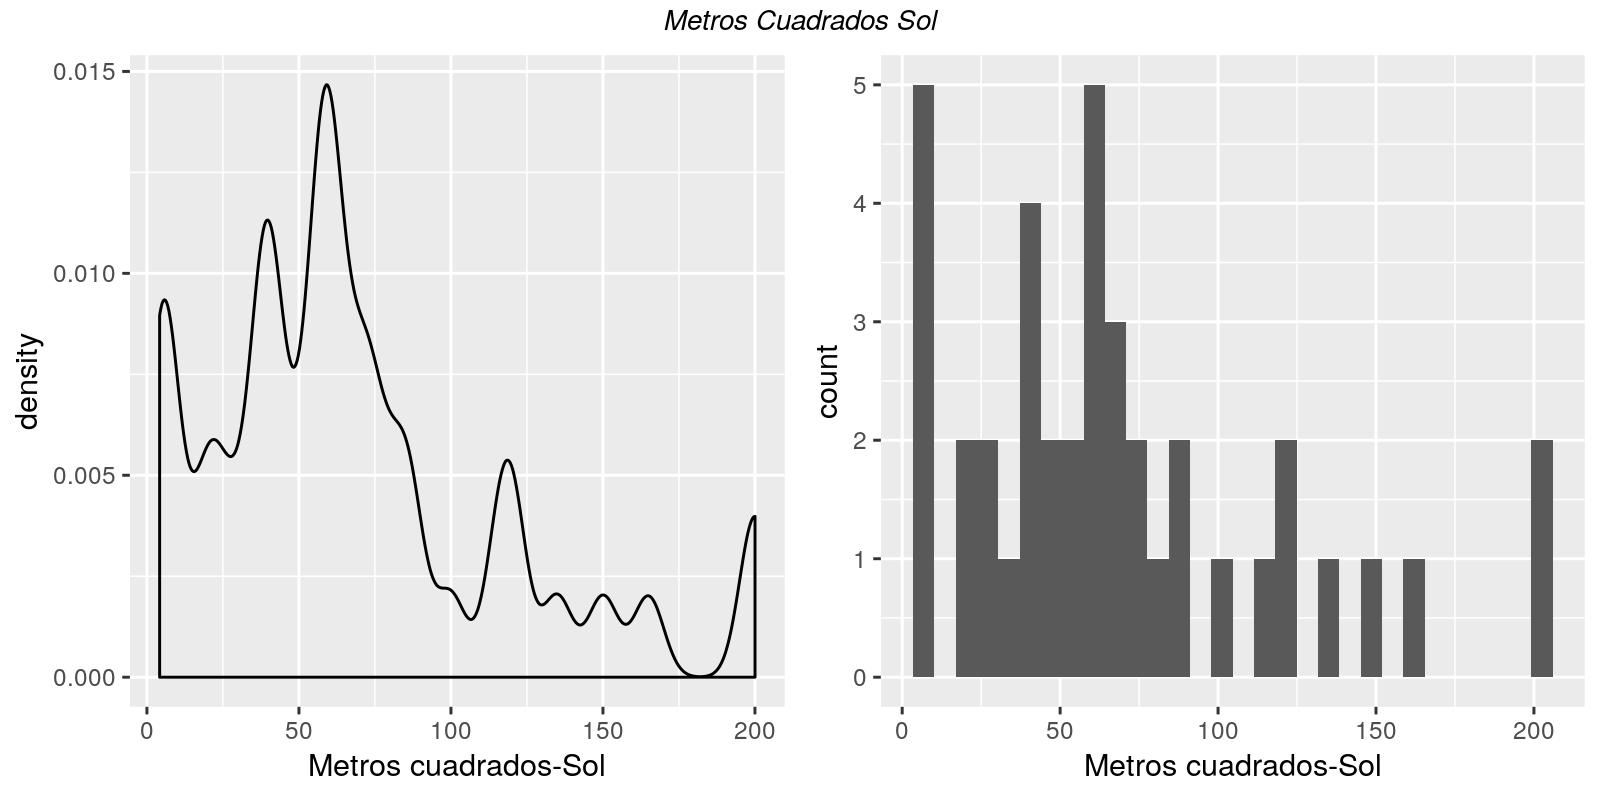

In [30]:
#Recupero la curva de densidad que hice sobre el barrio sin comparar con precio y poniendo algo de bw
#también miro el histograma a ver cuál me da más información. 
options(repr.plot.height=4,repr.plot.width=8 , repr.plot.res = 200)

sol1<-ggplot(barrio_Sol, aes(x=MetrosCuadrados))+ geom_density(bw=5)+xlab("Metros cuadrados-Sol")
sol2<-ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_histogram()+xlab("Metros cuadrados-Sol")
grid.arrange(sol1, sol2, nrow = 1,top = textGrob("Metros Cuadrados Sol",gp=gpar(fontsize=10,font=3)))

paste('Observo que aunque no tengo valores a 0 sí tengo valores muy bajos, demasiado para un apartamento entero, por lo que, como proponía antes, ordeno y hago un head y decido quitar valores por debajo de 18 m2 ')
head(sort(barrio_sol$MetrosCuadrados),10)


In [31]:
barrio_sol_metros<-subset(barrio_sol, MetrosCuadrados>18)

#Una vez ajustados los metros, vuelvo a hacer las correlaciones y mejoran
cor(barrio_sol_metros[,c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados')],use='pairwise.complete.obs')
paste('La correlación entre número de dormitorios y metros cuadrados sube')


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6112905
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8214959
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7120924
MetrosCuadrados,0.6112905,0.8214959,0.7120924,1.0000000


[1] "La correlación entre número de dormitorios y metros cuadrados sube"

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [32]:
#repito el modelo lineal que he hecho al principio de trabajar con este barrio.
paste('Vuelvo a ver el modelo lineal para la combinación de todas las variables:')
sol_lm<-lm(data= barrio_sol_metros, formula= Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)
summary(sol_lm)

paste('Con estos datos parece que la variable más significativa en relación con el precio es el NUMERO DE DORMITORIOS. Pruebo de todas formas modelos lineales 1 a 1 para ver la influencia de las distintas variables en el precio de manera individual.')

#pruebo de todas formas modelos lineales 1 a 1 para ver la influencia de las distintas variables en el precio de manera individual.
paste('Modelo lineal para la combinación número de Baños-Precio:')
sol_lm_banyos<-lm(data= barrio_sol_metros, formula= Precio ~ NumBanyos)
summary(sol_lm_banyos)

paste('Modelo lineal para la combinación número de dormitorios-Precio:')
sol_lm_dormitorios<-lm(data= barrio_sol_metros, formula= Precio ~ NumDormitorios)
summary(sol_lm_dormitorios)

paste('Modelo lineal para la combinación número de ocupantes-Precio:')
sol_lm_ocupantes<-lm(data= barrio_sol_metros, formula= Precio ~ MaxOcupantes)
summary(sol_lm_ocupantes)

paste('Modelo lineal para la combinación metros cuadrados-Precio:')
sol_lm_metros<-lm(data= barrio_sol_metros, formula= Precio ~ MetrosCuadrados)
summary(sol_lm_metros)

paste('A partir de estos modelos individuales, por el p-valor y el R2 sigue pareciendo que la variable que más influye en el precio es el número de dormitorios seguido de los metros cuadrados.')

#Podríamos ver la combinación de las dos variables.

[1] "Vuelvo a ver el modelo lineal para la combinación de todas las variables:"


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.853 -13.673  -5.048  18.523  69.472 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0360    12.9586   2.164  0.03859 * 
NumBanyos         0.5648    14.6039   0.039  0.96941   
NumDormitorios   28.2124     8.5440   3.302  0.00249 **
MaxOcupantes      2.6739     4.4329   0.603  0.55091   
MetrosCuadrados   0.2237     0.2050   1.091  0.28397   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


[1] "Con estos datos parece que la variable más significativa en relación con el precio es el NUMERO DE DORMITORIOS. Pruebo de todas formas modelos lineales 1 a 1 para ver la influencia de las distintas variables en el precio de manera individual."

[1] "Modelo lineal para la combinación número de Baños-Precio:"


Call:
lm(formula = Precio ~ NumBanyos, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.671 -22.475  -9.975  12.525 160.677 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    30.63      16.64   1.840   0.0747 .  
NumBanyos      54.35      10.56   5.148 1.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.28 on 33 degrees of freedom
Multiple R-squared:  0.4454,	Adjusted R-squared:  0.4286 
F-statistic: 26.51 on 1 and 33 DF,  p-value: 1.191e-05


[1] "Modelo lineal para la combinación número de dormitorios-Precio:"


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


[1] "Modelo lineal para la combinación número de ocupantes-Precio:"


Call:
lm(formula = Precio ~ MaxOcupantes, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.757 -17.944  -3.944  13.138 115.243 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    23.130     15.086   1.533    0.135    
MaxOcupantes   16.163      2.588   6.245 4.71e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.17 on 33 degrees of freedom
Multiple R-squared:  0.5416,	Adjusted R-squared:  0.5277 
F-statistic: 38.99 on 1 and 33 DF,  p-value: 4.706e-07


[1] "Modelo lineal para la combinación metros cuadrados-Precio:"


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.155 -18.407  -0.141   9.145 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9152    12.6756   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.596,	Adjusted R-squared:  0.5838 
F-statistic: 48.69 on 1 and 33 DF,  p-value: 5.601e-08


[1] "A partir de estos modelos individuales, por el p-valor y el R2 sigue pareciendo que la variable que más influye en el precio es el número de dormitorios seguido de los metros cuadrados."

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [33]:

paste('Por lo visto al final del punto anterior en los modelos individuales de cada variable con respecto al precio, por el R2, la variable más fiable a la hora de conocer el precio de un inmueble es el número de habitaciones. cuanto mayor es el R2 y más se acerque a 1, mejor es el ajuste del modelo y mayor es la fiabilidad de las prediciones de la variable.  ')

[1] "Por lo visto al final del punto anterior en los modelos individuales de cada variable con respecto al precio, por el R2, la variable más fiable a la hora de conocer el precio de un inmueble es el número de habitaciones. cuanto mayor es el R2 y más se acerque a 1, mejor es el ajuste del modelo y mayor es la fiabilidad de las prediciones de la variable.  "

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [34]:
sol_lm_metros<-lm(data= barrio_sol_metros, formula= Precio ~ MetrosCuadrados)
summary(sol_lm_metros)
confint(sol_lm_metros)
paste('El precio del alquiler por cada metro cuadrado extra del piso aumenta entre 0,694 y 1,265€ con un margen de confianza del 95%')
#de media aumenta 0.97€


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.155 -18.407  -0.141   9.145 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9152    12.6756   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.596,	Adjusted R-squared:  0.5838 
F-statistic: 48.69 on 1 and 33 DF,  p-value: 5.601e-08


,2.5 %,97.5 %
(Intercept),5.1264168,56.703896
MetrosCuadrados,0.6940008,1.265248


[1] "El precio del alquiler por cada metro cuadrado extra del piso aumenta entre 0,694 y 1,265€ con un margen de confianza del 95%"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [35]:
sol_lm_dormitorios<-lm(data= barrio_sol_metros, formula= Precio ~ NumDormitorios)
summary(sol_lm_dormitorios)
confint(sol_lm_dormitorios)
paste('El precio del alquiler por cada habitación del piso aumenta entre 31.187 y 47.780€ con un margen de confianza del 95%')
#de media aumenta 39.48€


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_metros)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


,2.5 %,97.5 %
(Intercept),23.87992,58.68671
NumDormitorios,31.18746,47.78095


[1] "El precio del alquiler por cada habitación del piso aumenta entre 31.187 y 47.780€ con un margen de confianza del 95%"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [38]:
entradas_3_hab<-sum(barrio_sol$NumDormitorios==3)
paste('El total de apartamentos en sol con 3 habitaciones es: ',entradas_3_hab)
total_entradas_barrio<-nrow(barrio_sol)
paste('El total de apartamentos en el barrio de Sol es: ',total_entradas_barrio)
prob_3_hab<-round(entradas_3_hab/total_entradas_barrio,2)
paste('La probabilidad de encontrar un apartamento de 3 habitaciones es de: ',prob_3_hab)
conf_prob_3_hab<-round(binom.test(entradas_3_hab,total_entradas_barrio)$conf,2)
paste('El intervalo de confianza está entre',conf_prob_3_hab[1],'y ',conf_prob_3_hab[2])


[1] "El total de apartamentos en sol con 3 habitaciones es:  55"

[1] "El total de apartamentos en el barrio de Sol es:  701"

[1] "La probabilidad de encontrar un apartamento de 3 habitaciones es de:  0.08"

[1] "El intervalo de confianza está entre 0.06 y  0.1"